# **0. 데이터 불러오기**

In [1]:
#나눔폰트 설치 후  런타임 재시작 
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (10.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155229 files and di

In [ ]:
import pandas as pd
import numpy as np
# 경고무시
import warnings
warnings.filterwarnings('ignore')

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_user = pd.read_csv('/content/drive/MyDrive/Wello+project_신희택,윤다솜/Data/유저데이터 샘플리스트 셔플(AIB전달용) - user_sample_encode.csv')
df_user.head()

In [ ]:
df_user.shape

In [ ]:
df_user.isna().sum()

In [ ]:
df_policy = pd.read_excel('/content/drive/MyDrive/Wello+project_신희택,윤다솜/Data/policy_metetable(AIB전달용).xlsx')
df_policy = df_policy.sort_values(by='정책ID').reset_index(drop=True)
df_policy.head()

In [ ]:
df_policy.shape

In [ ]:
# wello admit data 가져오기
wello = pd.read_csv('/content/drive/MyDrive/Wello+project_신희택,윤다솜/Data/정책정보_2021-12-28.csv',error_bad_lines=False)
# 2439번째 데이터 컬럼이 하나씩 밀려서 제외하고 가져오기.
wello

In [ ]:
# wello와 df_policy shape 비교
print(df_policy.shape)
print(wello.shape)

In [ ]:
print(df_policy.columns)
print(wello.columns)
# 정책ID', '정책서비스ID', '서비스명' 는 동일
# df_policy의 태그 붙인 변수들과 동일해보임.

In [ ]:
wello = wello.sort_values(by='정책ID').reset_index(drop=True)
wello

In [ ]:
wello_compared=wello.iloc[:88486].copy()
wello_compared.head()

In [ ]:
print(wello_compared.iloc[4]['직장상세'])
print(df_policy.iloc[4]['태그-직장상세'])

In [ ]:
print(wello_compared.iloc[4]['대상특성'])
print(df_policy.iloc[4]['태그-대상특성'])

In [ ]:
df_policy.iloc[4]['지원대상']

In [ ]:
df_policy[df_policy['소관기관유형']=='광역시도']['소관기관'].unique()

In [ ]:
# 질문 - 세가지

# 상황:
# 어드민 페이지에 있는 데이터 : A (노션에 나와있는 부분: A로 정답 데이터셋으로 구축할 수 있다.)
# 태그셋 리스트와 함께 있는 정책 데이터 : B
# 같은 정책 ID 4번을 가진 데이터를 A와 B에서 추출
# 직장상세명을 확인한 결과
# 결과 A는 설비/정비/생산직
# 결과 B는 농업/축산업/어업
# 실제 정책의 지원 대상이 어업인
# 결론: A의 태깅이 더 부정확

# 질문 첫번째: B의 태그도 모델을 돌려 구축한건가요? 
# 질문 두번째: 이 결과만 봤을 땐 A가 부정확해 A를 정답 데이터셋으로 볼 수 없는 것 아닌가요?
# 질문 세번쨰: B 데이터의 '태그-'로 시작하는 변수들은 feature engineering하면서 임의적으로 바꿔도 되는 부분인가요?


# **I. EDA**

## **0. 결측치 확인**

In [ ]:
df_policy.shape

In [ ]:
# 결측치 확인
df_policy.isna().sum() # 0인 값들, 정책에 항상 있는 값이자 중요 변수

In [ ]:
df_policy['서비스명'].unique()

## **1.서비스명 워드클라우드**

In [ ]:
service_name = df_policy['서비스명']

In [ ]:
name_txt = " ".join(service_name)

In [ ]:
len(name_txt)

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
cloud = WordCloud(font_path='/content/drive/MyDrive/Wello+project_신희택,윤다솜/fonts/NanumBarunGothic.ttf', width=800, height=600).generate(name_txt)
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

## **2. 소관기관 워드클라우드**

In [ ]:
df_policy['소관기관'].unique()

In [ ]:
service_agency = df_policy['소관기관']
agency_txt = " ".join(service_agency)
cloud = WordCloud(font_path='/content/drive/MyDrive/Wello+project_신희택,윤다솜/fonts/NanumBarunGothic.ttf', width=800, height=600).generate(agency_txt)
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

In [ ]:
service_agency_1 = df_policy['소관기관.1']
agency_1_txt = " ".join(service_agency_1)
cloud = WordCloud(font_path='/content/drive/MyDrive/Wello+project_신희택,윤다솜/fonts/NanumBarunGothic.ttf', width=800, height=600).generate(agency_1_txt)
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

In [ ]:
# 소관기관과 소관기관.1 값이 다른가?
print(df_policy[df_policy['소관기관']!=df_policy['소관기관.1']].shape)
# => 값이 같다.

## **3. 소관기관유형 워드클라우드**

In [ ]:
service_agencytype = df_policy['소관기관유형']
agencytype_txt = " ".join(service_agencytype)
cloud = WordCloud(font_path='/content/drive/MyDrive/Wello+project_신희택,윤다솜//fonts/NanumBarunGothic.ttf', width=800, height=600).generate(agencytype_txt)
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

In [ ]:
service_agencytype_1 = df_policy['소관기관유형.1']
agencytype_1_txt = " ".join(service_agencytype_1)
cloud = WordCloud(font_path='/content/drive/MyDrive/Wello+project_신희택,윤다솜/fonts/NanumBarunGothic.ttf', width=800, height=600).generate(agencytype_1_txt)
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

In [ ]:
# 소관기관유형과 소관기관유형.1 값이 다른가?
print(df_policy[df_policy['소관기관유형']!=df_policy['소관기관유형.1']].shape)
# => 유일하게 소관기관유형이 중앙행정기관인 곳만 중앙정부로 취급함. 1071개가 다름.

In [ ]:
# 소관기관 유형과 .1과 다른 데이터 프레임 뽑아 확인한 결과 일부 중앙행정기관만 중앙정부로 분류되는 것 확인
print(df_policy[df_policy['소관기관유형']!=df_policy['소관기관유형.1']]['소관기관유형'].unique())
print(df_policy[df_policy['소관기관유형']!=df_policy['소관기관유형.1']]['소관기관유형.1'].unique())


print('소관기관유형이 중앙행정기관인 곳: ',df_policy[df_policy['소관기관유형']=='중앙행정기관']['소관기관'].unique())
print('소관기관유형.1이 중앙정보인 곳: ',df_policy[df_policy['소관기관유형']!=df_policy['소관기관유형.1']]['소관기관'].unique())
# 알 수 있는 사실:
# '국민권익위원회' '국가인권위원회'
#  '조달청' '소방청' '해양경찰청' '공정거래위원회' '새만금개발청' '행정중심복합도시건설청' '원자력안전위원회' '법제처'
#  '기획재정부' '행정자치부'
# 위와 같은 소관기관을 가진 곳만 소관기관유형.1이 중앙행정기관으로 동일.
# 나머지 소관기관의 경우 모두 중앙정보로 취급하는가??


In [ ]:
joongangjb = df_policy[df_policy['소관기관유형']!=df_policy['소관기관유형.1']]['소관기관'].unique()
len(df_policy[df_policy['소관기관'].apply(lambda x: x in joongangjb)])
# 소관기관유형.1이 중앙정보로 나오는 소관기관을 뽑아 개수를 세어보니 2296개가 나옴.

# 위에서 언급한 변수가 모두 다 중앙정보로 분류되는 것은 아닌듯.
# 어떤게 기준인가?는 모르겠음.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumBarunGothic'
sns.set(font="NanumBarunGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

In [ ]:
plt_agency_type = pd.DataFrame(df_policy.groupby(by='소관기관유형').size()).reset_index().rename(columns={0:'count'}).sort_values(by='count')
print(plt_agency_type)
sns.barplot(data=plt_agency_type,x='소관기관유형',y='count')
# 소관기관 유형이 시군구인게 압도적으로 많음.

In [ ]:
# 일부만 중앙행정기관으로 나뉘는 것 확인 가능
pd.DataFrame(df_policy.groupby(by='소관기관유형.1').size()).reset_index().rename(columns={0:'count'})

## **4. 생애주기**

In [ ]:
df_policy['생애주기'].unique()

In [ ]:
g_df_policy = pd.DataFrame(df_policy.groupby(by='생애주기').size()).reset_index()
g_df_policy
generation = pd.DataFrame(data=0,index=['영·유아','아동·청소년','청년','중장년','노년기'],columns=['num'])
generation

In [ ]:
for i in range(len(g_df_policy)):
  g = g_df_policy.iloc[i,0]
  if '영·유아' in g:
    generation.loc['영·유아'] += g_df_policy.iloc[i,1]
  elif '아동·청소년' in g:
    generation.loc['아동·청소년'] += g_df_policy.iloc[i,1]
  elif '청년' in g:
    generation.loc['청년'] += g_df_policy.iloc[i,1]
  elif '중장년' in g:
    generation.loc['중장년'] += g_df_policy.iloc[i,1]
  else:
    generation.loc['노년기'] += g_df_policy.iloc[i,1]
  

In [ ]:
generation

In [ ]:
sns.barplot(data=generation, x=generation.index,y='num')

## **5. 선정기준 워드클라우드**

In [ ]:
df_policy['선정기준']

In [ ]:
## 기타 기호가 들어가 있어서 에러 뜸. 기호 제거 후 실행 가능할 듯
# service_criteria = df_policy['선정기준']
# criteria_txt = " ".join(service_criteria)
# cloud = WordCloud(font_path='/content/drive/MyDrive/Wello+project_신희택,윤다솜/fonts/NanumBarunGothic.ttf', width=800, height=600).generate(criteria_txt)
# plt.figure(figsize=(20, 15))
# plt.imshow(cloud)
# plt.axis('off')

## **6. 지원유형 워드클라우드**

In [ ]:
## 기타 기호가 들어가 있어서 에러 뜸. 기호 제거 후 실행 가능할 듯
# service_submittype = df_policy['지원유형']
# submittype_txt = " ".join(service_submittype)
# cloud = WordCloud(font_path='/content/drive/MyDrive/Wello+project_신희택,윤다솜/fonts/NanumBarunGothic.ttf', width=800, height=600).generate(submittype_txt)
# plt.figure(figsize=(20, 15))
# plt.imshow(cloud)
# plt.axis('off')

## **7. 서비스목적 워드클라우드**

In [ ]:
service_purpose = df_policy['서비스목적']
purpose_txt = " ".join(service_purpose)
cloud = WordCloud(font_path='/content/drive/MyDrive/Wello+project_신희택,윤다솜/fonts/NanumBarunGothic.ttf', width=800, height=600).generate(purpose_txt)
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

## **8. 지원내용 워드클라우드**

In [ ]:
service_contents = df_policy['지원내용']
contents_txt = " ".join(service_contents)
cloud = WordCloud(font_path='/content/drive/MyDrive/Wello+project_신희택,윤다솜/fonts/NanumBarunGothic.ttf', width=800, height=600).generate(contents_txt)
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

In [ ]:
df_policy['태그-지원유형상세'].unique()

## **9. 지원대상 워드클라우드**

In [ ]:
service_applicants = df_policy['지원대상']
applicants_txt = " ".join(service_applicants)
cloud = WordCloud(font_path='/content/drive/MyDrive/Wello+project_신희택,윤다솜/fonts/NanumBarunGothic.ttf', width=800, height=600).generate(applicants_txt)
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

In [ ]:
df_policy['태그-대상특성'].unique()

In [ ]:
df_policy['태그-대상특성상세'].unique()

In [ ]:
# 결론적으로 분석에 큰 지장이 없을 것 같아 소관기관유형.1과 소관기관.1을 삭제하도록함.
df_policy = df_policy.drop(['소관기관유형.1', '소관기관.1'],axis=1)

## **10. 변수 연결**

In [ ]:
df_policy.columns

In [ ]:
wello_compared.columns

* 신청절차

In [ ]:
df_policy['신청절차'].unique()

In [ ]:
wello_compared['신청절차'].unique()
# 온라인, 오프라인 => 복합으로 통일

* 자녀

In [ ]:
df_policy['생애주기'].unique()

In [ ]:
wello_compared['자녀'].unique()
# 없음 있음은 대체 무엇 ?

* 가구원

In [ ]:
df_policy['생애주기'].unique()

In [ ]:
wello_compared['가구원'].unique()


* 성별

In [ ]:
df_policy['지원대상'].unique()

In [ ]:
wello_compared['성별'].unique()
# 온라인, 오프라인 => 복합으로 통일

* 학력

In [ ]:
df_policy['선정기준'].unique()

In [ ]:
wello_compared['학력'].unique()
# 온라인, 오프라인 => 복합으로 통일

* 성별

In [ ]:
df_policy['지원유형'].unique()

In [ ]:
wello_compared['지원유형'].unique()
# 온라인, 오프라인 => 복합으로 통일

* 관심사항특성

In [ ]:
wello_compared['관심상황특성'].unique()
# 온라인, 오프라인 => 복합으로 통일

# **II. Feature Engineering**

## **1. 지역(시도) 만들기**

In [ ]:
# df_policy[df_policy['소관기관유형']=='시군구']

In [ ]:
# 지역(시도) 변수 생성
# 아래 시군구를 통해 지역(시도)값 더 보충한다.
def sido(df):
  for i in range(len(df)):
    AGENCY_TYPE = df.loc[i,'소관기관유형']
    # 소관기관 유형이 광역시도인 경우 소관기관을 시도값으로 넣는다.
    if AGENCY_TYPE=='광역시도':
      df.loc[i,'sido'] = df.loc[i,'소관기관']
    # 소관기관 유형이 시군구인 경우 띄어쓰기 앞에있는 시도값을 넣는다.
    elif AGENCY_TYPE=='시군구':
      sd = df.loc[i,'소관기관'].split(' ')[0]
      df.loc[i,'sido'] = sd
    # 소관기관 유형이 교육청인 경우 교육청을 제외한 값이 시도값이므로 넣는다.
    elif AGENCY_TYPE == '교육청':
      df.loc[i,'sido'] = df.loc[i,'소관기관'][:-3]
    # 이외의 값은 일단 전국으로 넣어준다.
    else:
      df.loc[i,'sido'] = '전국'
  return df

In [ ]:
# 약 5분 소요
sido(df_policy)

## **2. 지역(시군구) 만들기**

### **1. 도 - 시군구 테이블 & 광역시도 테이블 생성**

In [ ]:
# 1. 도와 시군구 테이블 생성
# 시군구에 대한 값을 추출해보았다.
DSGG = df_policy[df_policy['소관기관유형']=='시군구']['소관기관'].unique()
df_DSGG = pd.DataFrame(columns=['도','시군구'])

In [ ]:
# 소관기관유형 시군구인 소관기관에서 각 도와 시군구값 뺴기
for i in range(len(DSGG)):
  val = DSGG[i].split(' ')
  df_DSGG.loc[i,'도'] = val[0]
  df_DSGG.loc[i,'시군구'] = val[1]  

In [ ]:
def namesigun(var):
  return var[:2]

In [ ]:
df_DSGG['시군구명'] = df_DSGG['시군구'].apply(namesigun)

In [ ]:
# df_DSGG 는 도와 시군구 시군구명 앞의 두글자를 따서 만든 데이터 프레임이다.
# 이 데이터 프레임의 쓰임은 소관기관유형이 공공기관인 곳에서 '시흥 갯골..' 이런식으로 시작하는 공공기관을 지역(시도) 및 지역(시군구)로 만들기 위함이다.
df_DSGG

In [ ]:
UNIQ = df_policy[df_policy['소관기관유형']=='공공기관 등']['소관기관'].unique()
# 광역시가 들어간 공공기관 뽑기
[i for i in UNIQ if '광역시' in i]
# 광역시 + 도시 or 시설 or 구 포함.
# 지역(시군구) 추출 시 if 문으로 나눌 수 있음.

In [ ]:
# 2. 광역시도 관련된 광역시도명 테이블 만들기
sido_total = df_policy[df_policy['소관기관유형']=='광역시도']['소관기관'].unique()
df_sido_total = pd.DataFrame(columns=['광역시도','광역시도명'])
for i in range(len(sido_total)):
  val = sido_total[i]
  df_sido_total.loc[i,'광역시도']=val
  # if ('광역' in val) or ('특별' in val):
  #   df_sido_total.loc[i,'광역시도명']=val[:2]
  # else:
  
  df_sido_total.loc[i,'광역시도명']=val[:2]
  if ('북' in val) or ('남' in val):
    df_sido_total.loc[i,'광역시도명']+= ', '+val[0]+val[2]

In [ ]:
df_sido_total

In [ ]:
df_sido_total.loc[0,'광역시도명']+=', 강'

### **2. 지역(시군구) 생성 및 지역(시도) 보충**

In [ ]:
# 지역(시군구) 생성

def sigungu(df):
  name_gysd = df_sido_total['광역시도명'].values
  name_sgg = df_DSGG['시군구명'].values
  for i in range(len(df)):
    # 시군구인 경우엔 바로 시군구 값을 넣어준다
    if df.loc[i,'소관기관유형']=='시군구':
      sd = df.loc[i,'소관기관'].split(' ')[1]
      df.loc[i,'sigungu'] = sd
    # 공공기관의 경우에 해당하면
    elif df.loc[i,'소관기관유형']=='공공기관 등':
      # 소관기관의 이름과 앞의 두글자를 딴 변수를 구한다.
      val = df.loc[i,'소관기관']
      preval = df.loc[i,'소관기관'][:2]
      
      # 공공기관이면서 광역시 혹은 특별시가 들어간 경우
      if ('광역시' in val) or ('특별시' in val):
        # 00광역시로 시작하므로 시도값은 00광역시까지의 값
        df.loc[i,'sido'] = val[:5]
        # 00광역시00구 까지 써있는 경우엔 구값을 구해 시군구에 넣어준다.
        if '구' in val:
          num = val.find('구')
          SIGUN = val[5:num+1]
          df.loc[i,'sigungu'] = SIGUN
        # 00광역시만 있으면 구는 일단 NAN으로 처리
        else:
          df.loc[i,'sigungu'] = '전체'
      # 광주환경공단은 광역시가 아닌 광주광역시에서 주도하는 단체
      elif val == '광주환경공단':
        df.loc[i,'sido']='광주광역시'
        df.loc[i,'sigungu']='전체'
      # 앞의 두글자를 딴 변수 값이 위에서 만든 df_DSGG 시군구명에 들어간다면
      elif preval in name_sgg:
        # 해당 시군구명과 시도값을 넣어준다.
        val_df = df_DSGG[df_DSGG['시군구명']== preval]
        SIGUN = val_df.iloc[0,1]
        SIDO = val_df.iloc[0,0]
        df.loc[i,'sigungu']=SIGUN
        df.loc[i,'sido']=SIDO
      # 특정 광역시도가 들어간 곳 찾기
      elif preval in name_gysd:
        val_df = df_sido_total[df_sido_total['광역시도명']==preval]
        SIDO = val_df.iloc[0,0]
        df.loc[i,'sigungu']='전체'
        df.loc[i,'sido']=SIDO
      # 특정 광역시도가 들어간 곳 찾기
      elif preval in name_gysd:
        val_df = df_sido_total[df_sido_total['광역시도명']==preval]
        if len(val_df)>1:
          SIDO = val_df.iloc[0,0]
          df.loc[i,'sigungu']='전체'
          df.loc[i,'sido']=SIDO
        else:
          SIDO = val[:4]
          df.loc[i,'sigungu']='전체'
          df.loc[i,'sido']=SIDO
      # 그 외엔 시군구 NAN
      else:
        df.loc[i,'sigungu']='전체'
    else:
      df.loc[i,'sigungu']='전체'
  return df

In [ ]:
# 지역(시군구) 변수 생성 시, 광주가 들어간 소관기관 중 광주 도시관리공사을 제외한 값들은 전라도 광주광역시이다.
# 따라서 공공기관 앞 두글자를 따서 시군구를 추출하는 과정에서 광주환경공단만 광주광역시로 빼줘야한다.
# 위 변수 생성 시 # 광주환경공단은 광역시가 아닌 광주광역시에서 주도하는 단체 부분 증거
abc = df_policy[df_policy['소관기관유형']=='공공기관 등']['소관기관'].unique()
[i for i in abc if '광주' in i]
# '광주' in abc.values()

In [ ]:
sigungu(df_policy)

In [ ]:
# 특정 지역에 해당하는 값을 대부분 제외했지만, 강원랜드와 경남개발공사, 전남개발공사 등 (주)가 포함되었거나 이름을 압축해서 부르는 경우가 있다.
df_policy[df_policy['sido'].isnull()]['소관기관'].unique()

### **3. 광역시도인 경우, 시군구의 값 어드민데이터에서 확인**

In [ ]:
# 어드민 데이터 광역시도인 값에 지역(시군구) 값 확인
# 각 8도와 광역시의 시군구 값, 다 추출 불가
GYSD_ID = df_policy[df_policy['소관기관유형']=='광역시도']['정책ID'].unique()
wello_compared[wello_compared['정책ID'].apply(lambda x: x in GYSD_ID)]['지역(시군구)'].unique()
t1229_2 = wello_compared[wello_compared['정책ID'].apply(lambda x: x in GYSD_ID)][['정책ID','지역(시도)','지역(시군구)']]
t1229_2
t1229_2['지역(시도)'].unique()

In [ ]:
# 강원도의 경우 시군구는 전체
t1229_2[t1229_2['지역(시도)']=='강원도'][['지역(시도)','지역(시군구)']].value_counts()

In [ ]:
# 경기도의 경우 시군구가 여러값인 걸 확인할 수 있다.
t1229_2[t1229_2['지역(시도)']=='경기도'][['지역(시도)','지역(시군구)']].value_counts()
# 결론: 광역시도로만 되어있는 정책은 모델링을 통해 보완해야 할 듯.

### **4. 어드민 데이터와 시도 및 시군구 비교해보기**

* 넣은 지역(시도)값과 어드민 데이터와 다른 데이터 값 찾기

In [ ]:
SIDO_ID = df_policy[df_policy['sido'].notnull()]['정책ID'].values
SIDO_DF = df_policy[df_policy['정책ID'].apply(lambda x: x in SIDO_ID)]['sido']
SIDO_DF2 = wello_compared[wello_compared['정책ID'].apply(lambda x: x in SIDO_ID)]['지역(시도)']

In [ ]:
# NAN의 경우 전국으로 수정하거나 모델링할 떄 수정하면 될 듯 하다.
# 하지만 17645 인덱스 값은 내가 예측한 경상남도에 더 가까운 것 같지만 어드민데이터엔 왜 경기도라 되어있는지 의문이 남는다.
# 총 109개 다른 것을 확인할 수 있음.
# SIDO_DF: 내가 넣은 시도값
# SIDO_DF2: 어드민 데이터에 있는 시도값
SIDO_DF[(SIDO_DF != SIDO_DF2)&(SIDO_DF!='전국')]

In [ ]:
SIDO_DF2[(SIDO_DF != SIDO_DF2)&(SIDO_DF!='전국')]

In [ ]:
df_policy.loc[88451]

* 전국으로 치부한 지역(시도)값과 어드민 데이터와 다른 데이터 값 찾기

In [ ]:
# 넣은 지역(시도)값과 어드민 데이터와 다른 데이터 값 찾기
# 총 267개 다른 것을 확인할 수 있음.
# SIDO_DF: 내가 전국이라고 넣은 시도값
# SIDO_DF2: 어드민 데이터에 있는 시도값
SIDO_ID = df_policy[df_policy['sido']=='전국']['정책ID'].values
SIDO_DF = df_policy[df_policy['정책ID'].apply(lambda x : x in SIDO_ID)]['sido']
SIDO_DF2 = wello_compared[wello_compared['정책ID'].apply(lambda x : x in SIDO_ID)]['지역(시도)']

In [ ]:
# SIDO_DF
SIDO_DF[SIDO_DF != SIDO_DF2]

In [ ]:
SIDO_DF2[SIDO_DF != SIDO_DF2]

In [ ]:
# 서비스명을 통해 보완 가능할 듯.
print(df_policy.loc[81495]['서비스명'])
print(df_policy.loc[81496]['서비스명'])
print(df_policy.loc[81580]['서비스명'])
print(df_policy.loc[81818]['서비스명'])
print(df_policy.loc[81819]['서비스명'])
# 지원대상을 통해 보완 가능할 듯.
print(df_policy.loc[88296]['지원대상'])

In [ ]:
df_policy.loc[81495]

* 넣은 지역(시군구)값과 어드민 데이터와 다른 데이터 값 찾기

In [ ]:

SIGUNGU_ID = df_policy[df_policy['sigungu'].notnull()]['정책ID'].values
SIGUNGU_DF = df_policy[df_policy['정책ID'].apply(lambda x: x in SIGUNGU_ID)]['sigungu']
SIGUNGU_DF2 = wello_compared[wello_compared['정책ID'].apply(lambda x: x in SIGUNGU_ID)]['지역(시군구)']

In [ ]:
# 5개의 값만 다른 것으로 보인다.
# NAN의 경우 전국으로 수정하거나 모델링할 떄 수정하면 될 듯 하다.
# 하지만 17645 인덱스 값은 내가 예측한 경상남도에 더 가까운 것 같지만 어드민데이터엔 왜 경기도라 되어있는지 의문이 남는다.
SIGUNGU_DF[(SIGUNGU_DF != SIGUNGU_DF2)&(SIGUNGU_DF!='전체')]

In [ ]:
SIGUNGU_DF2[(SIGUNGU_DF != SIGUNGU_DF2)&(SIGUNGU_DF!='전체')]
# 총 잘못 분류된 건수 7233 but 지역(시도)에서부터 잘못 되었을 가능성 0
# 어드민 데이터에 양주시로 분류되어있는 건수가 총 326건. => 남양주가 잘못 분류된 것으로 추정

In [ ]:
df_policy.loc[88450]

In [ ]:
# 위 주장에 대한 근거
df_policy.loc[8039]

In [ ]:
# 위 주장에 대한 근거2
SIGUNGU_DF2[(SIGUNGU_DF != SIGUNGU_DF2)&(SIGUNGU_DF2=='양주시')]

* '전체' 값으로 넣은 지역(시군구)값과 어드민 데이터와 다른 데이터 값 찾기

In [ ]:
SIGUNGU_ID = df_policy[df_policy['sigungu']=='전체']['정책ID'].values
SIGUNGU_DF = df_policy[df_policy['정책ID'].apply(lambda x: x in SIGUNGU_ID)]['sigungu'].copy()
SIGUNGU_DF2 = wello_compared[wello_compared['정책ID'].apply(lambda x: x in SIGUNGU_ID)]['지역(시군구)'].copy()

In [ ]:
# 전체로 넣은 값
SIGUNGU_DF[SIGUNGU_DF.isnull() != SIGUNGU_DF2.isnull()]

In [ ]:
wello_compared[wello_compared['지역(시도)']=='전국']['지역(시군구)'].unique()

In [ ]:
check = wello_compared[wello_compared['지역(시군구)'].isnull()]['정책ID'].values
check_df = wello_compared[wello_compared['정책ID'].apply(lambda x: x in check)]
check_df[check_df['지역(시도)']!='전국']

In [ ]:
df_policy.loc[70143]

In [ ]:
wello_compared.loc[88464]

In [ ]:
# 어드민 데이터의 경우 결측값으로 들어간 데이터가 전부..
SIGUNGU_DF2[SIGUNGU_DF.isnull() != SIGUNGU_DF2.isnull()].unique()

In [ ]:
JA_ID=df_policy[df_policy['소관기관유형']=='중앙행정기관']['정책ID'].unique()
wello_compared[wello_compared['정책ID'].apply(lambda x: x in JA_ID)]['지역(시도)'].unique()

In [ ]:
# 중앙행정기관인 경우의 지역(시도)를 확인한 결과 전국이 아닌 곳은 서비스명에서 추출가능해보인다.
# t1229_3=wello_compared[wello_compared['정책ID'].apply(lambda x: x in JA_ID)].copy()
# t1229_3[t1229_3['지역(시도)']!='전국']

In [ ]:
df_policy.loc[17645,'지원대상']

In [ ]:
# df_policy.loc[1070]

In [ ]:
# df_policy.loc[1070]['소관기관']

##  **3. 신청절차** ##

In [ ]:
df_policy_apply_type = df_policy[['정책ID','정책서비스ID','서비스명','소관기관','온라인신청사이트URL','신청절차','태그-신청절차']]
df_policy_apply_type.head()

* 온라인, 오프라인 열을 생성
* '온라인신청사이트URL'의 값을 확인하여 '온라인'열에 해당하는 값 추가
* '신청절차'의 값을 확인하여 '오프라인'열에 해당하는 값 추가
* '온라인'열과 '오프라인'열을 비교하여 '태그-신청절차'에 값 반영

In [ ]:
# 온라인, 오프라인 여부를 따로 측정을 위한 열 생성
df_policy_apply_type.loc[:,'온라인'] = np.NaN
df_policy_apply_type.loc[:,'오프라인'] = np.NaN
df_policy_apply_type.loc[:,'종합'] = np.NaN

In [ ]:
df_policy_apply_type.head()

In [ ]:
df_policy_apply_type['태그-신청절차'].isna().sum()

In [ ]:
df_policy_apply_type['태그-신청절차'].value_counts()

In [ ]:
# 온라인신청사이트URL 값: '홈페이지 주소', '-', '방문', '불가능', '온라인 신청은 불가', '전자문서 시행' , '정상섭', '지방자치단체 통합 인터넷원서접수센터'
# 온라인 : 홈페이지 주소, 전자문서 시행, 지방자치단체 통합 인터넷원서접수센터
# 오프라인 : 방문, 불가능, 온라인 신청은 불가, 정상섭
# 정상섭은 개인으로 보이며, 2017년도에만 시행한 정책임.
for i in range(len(df_policy_apply_type)):
    if df_policy_apply_type['온라인신청사이트URL'][i] not in ['방문', '불가능', '온라인 신청은 불가', '정상섭', '-']:
        df_policy_apply_type['온라인'][i] = '온라인'
    else:
        df_policy_apply_type['오프라인'][i] = '오프라인'

df_policy_apply_type.head()

In [ ]:
print('온라인 결측치: ', df_policy_apply_type['온라인'].isna().sum(), '오프라인 결측치: ', df_policy_apply_type['오프라인'].isna().sum(), '종합 결측치: ', df_policy_apply_type['종합'])


```
# 신청 절차에서 키워드로 온/오프라인 분류
# 온라인: 인터넷, 온라인, 사이트
# 오프라인: 유선, 사무소, 센터, 방문
online = '인터넷|온라인|사이트'
offline = '유선|사무소|센터|방문'

for i in range(len(df_policy_apply_type)):
    if df_policy_apply_type['신청절차'].str.contains(online)[i] == True:
        df_policy_apply_type['온라인'][i] = '온라인'
    elif df_policy_apply_type['신청절차'].str.contains(offline)[i] == True:
        df_policy_apply_type['오프라인'][i] = '오프라인'

df_policy_apply_type.head()
```
위 코드 실행 결과 2시간이 넘도록 작업이 진행되었다. \
OR(|) 연산자를 사용했기 때문에 시간이 오래 소요된 것으로 예상한다. \
그래서 문자열에 포함된 값을 단계적으로 적용할 계획이다.


In [ ]:
df_policy_apply_type['신청절차'] = df_policy_apply_type['신청절차'].astype(str)

In [ ]:
for i in range(len(df_policy_apply_type)):
    if ('인터넷' in df_policy_apply_type.loc[i,'신청절차'])|('온라인' in df_policy_apply_type.loc[i,'신청절차'])|('사이트' in df_policy_apply_type.loc[i,'신청절차'])|('페이지' in df_policy_apply_type.loc[i,'신청절차'])|('접속' in df_policy_apply_type.loc[i,'신청절차']):
        df_policy_apply_type.loc[i,'온라인']='온라인'
    elif ('유선' in df_policy_apply_type.loc[i,'신청절차'])|('사무소' in df_policy_apply_type.loc[i,'신청절차'])|('센터' in df_policy_apply_type.loc[i,'신청절차'])|('방문' in df_policy_apply_type.loc[i,'신청절차'])|('우편' in df_policy_apply_type.loc[i,'신청절차'])|('현장' in df_policy_apply_type.loc[i,'신청절차'])|('읍면동' in df_policy_apply_type.loc[i,'신청절차'])|('부서' in df_policy_apply_type.loc[i,'신청절차']):
        df_policy_apply_type.loc[i,'오프라인']='오프라인'

In [ ]:
for i in range(len(df_policy_apply_type)):
    if df_policy_apply_type['온라인'][i] == '온라인' and df_policy_apply_type['오프라인'][i] == '오프라인':
        df_policy_apply_type['종합'][i] = '온/오프라인 복합'
    elif df_policy_apply_type['온라인'][i] != '온라인' and df_policy_apply_type['오프라인'][i] == '오프라인':
        df_policy_apply_type['종합'][i] = '오프라인'
    elif df_policy_apply_type['온라인'][i] == '온라인' and df_policy_apply_type['오프라인'][i] != '오프라인':
        df_policy_apply_type['종합'][i] = '온라인'

In [ ]:
print('온라인 결측치: ', df_policy_apply_type['온라인'].isna().sum(), '오프라인 결측치: ', df_policy_apply_type['오프라인'].isna().sum(), '종합 결측치: ', df_policy_apply_type['종합'].isna().sum())

In [ ]:
df_policy_apply_type['종합'].value_counts()

## 새로운 폴리시 데이터 eda

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumBarunGothic'
sns.set(font="NanumBarunGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

In [9]:
d_ent_final = pd.read_csv('/content/drive/MyDrive/Wello+project_신희택,윤다솜/Data/01. 기업 데이터 최종/d_ent_final.csv')
p_ent_final = pd.read_csv('/content/drive/MyDrive/Wello+project_신희택,윤다솜/Data/02. 정책 데이터 최종/new_p_ent_final.csv')
concat_rating = pd.read_csv('/content/drive/MyDrive/Wello+project_신희택,윤다솜/Data/02. 정책 데이터 최종/concat_rating.csv')
# model = load_model('/content/drive/MyDrive/Wello+project_신희택,윤다솜/3. Modeling/model1.h5')

In [10]:
dg = d_ent_final[d_ent_final['업종(대분류)'].apply(lambda x: ('0' not in x)&('중견기업' not in x)&('판단불가' not in x))].groupby(by='업종(대분류)').count()[['기업ID']].reset_index()
dg = dg.sort_values(by='기업ID',ascending=False)

In [ ]:
dg

In [14]:
df_ppt = dg[:5].reset_index(drop=True)
df_ppt

,업종(대분류),기업ID
0,제조업,679
1,부동산업,354
2,건설업,273
3,도매 및 소매업,268
4,금융 및 보험업,233


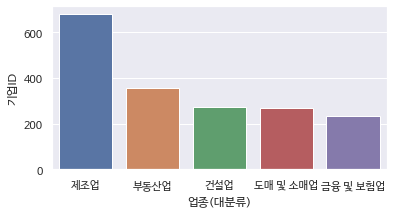

In [20]:
plt.figure(figsize=(6,3))
sns.barplot(data=df_ppt,x='업종(대분류)',y='기업ID')

In [21]:
dg2 = d_ent_final[d_ent_final['기업규모'].apply(lambda x: ('판단불가' not in x)&('판단제외' not in x)&('기타' not in x))].groupby(by='기업규모').count()[['기업ID']].reset_index()
dg2

,기업규모,기업ID
0,대기업,27
1,소기업,54
2,소상공인,50
3,중견기업,62
4,중기업,165
5,중소기업,1767


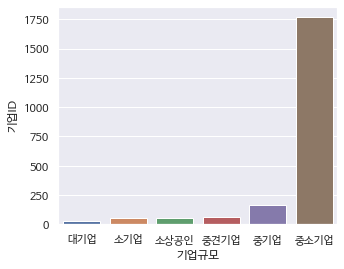

In [22]:
plt.figure(figsize=(5,4))
sns.barplot(data=dg2,x='기업규모',y='기업ID')

In [23]:
p_ent_final

,정책ID,정책서비스ID,서비스명,태그-신청절차,태그-지원유형,태그-지역(시도),태그-지역(시군구),태그-기업규모,태그-업종(대분류),태그-업력(시작),태그-업력(종료)
0,1,116010000027,‘힘내라 대한민국’특별운영자금 (산업은행),복합,"현금,현물",전국,전체,중소기업/중견기업,무관,0.0,0.0
1,2,119200000016,원양어업 경영자금 지원,오프라인,"현금,현물",전국,전체,무관,"농업, 임업 및 어업",0.0,0.0
2,3,119200000024,수산장비 구입 지원,오프라인,"현금,현물",전국,전체,무관,"농업, 임업 및 어업/제조업",0.0,0.0
3,4,119200000027,산지 및 소비지 유통자금 융자 지원,오프라인,"현금,현물",전국,전체,무관,도매 및 소매업,0.0,0.0
4,5,119200000044,수산경영인회생자금,오프라인,"현금,현물",전국,전체,무관,"농업, 임업 및 어업",0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
16190,17935,BIZC00069904,[부산] 2021년 크리에이터스튜디오 상상플러스부산 숏폼 콘텐츠 제작지원 사업 추가...,온라인,정보제공,부산광역시,전체,무관,무관,0.0,0.0
16191,17936,BIZC00069903,[충북] 지역 중소기업 대상 찾아가는 R&D사업 1:1 코칭 안내,복합,기타,충청북도,전체,중소기업,"전문, 과학 및 기술 서비스업",0.0,0.0
16192,17937,BIZC00069902,[대전] 2021년 나노융합분야 국내전시회 참가지원사업 추가모집 연장 공고,복합,정보제공/복지,대전광역시,전체,중소기업,"운수 및 창고업/숙박 및 음식점업/전문, 과학 및 기술 서비스업",0.0,0.0
16193,17938,BIZC00069901,2021년 2차 중소ㆍ중견기업 현장애로기술 지원사업 시행 공고,복합,"현금,현물",전국,전체,중소기업/중견기업/대기업,"전문, 과학 및 기술 서비스업",0.0,6.0


In [24]:
p_ent = pd.read_csv('/content/drive/MyDrive/Wello+project_신희택,윤다솜/Data/05. 기타 데이터/p_ent_ver2.csv')

### ** 지원내용 워드클라우드**

(-0.5, 799.5, 599.5, -0.5)

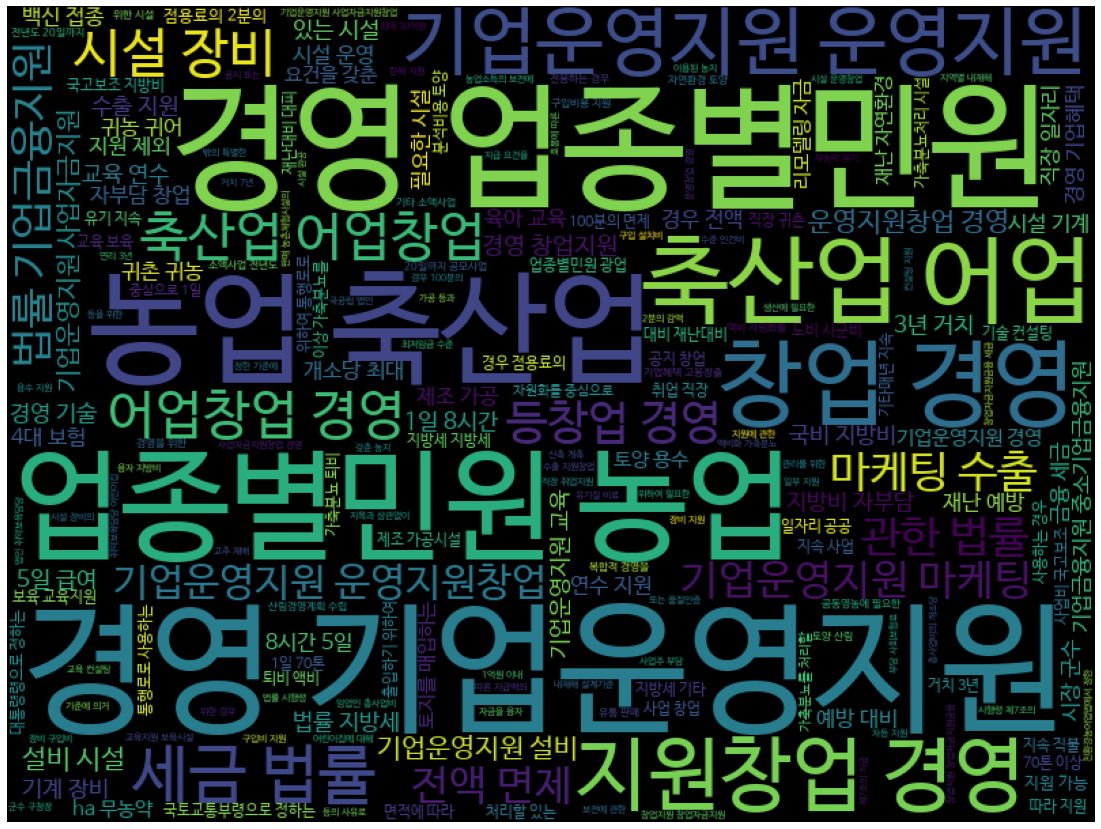

In [27]:
service_contents = p_ent['지원내용']
contents_txt = " ".join(service_contents)
cloud = WordCloud(font_path='/content/drive/MyDrive/Wello+project_신희택,윤다솜/fonts/NanumBarunGothic.ttf', width=800, height=600).generate(contents_txt)
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

In [ ]:
df_policy['태그-지원유형상세'].unique()

### ** 지원대상 워드클라우드**

(-0.5, 799.5, 599.5, -0.5)

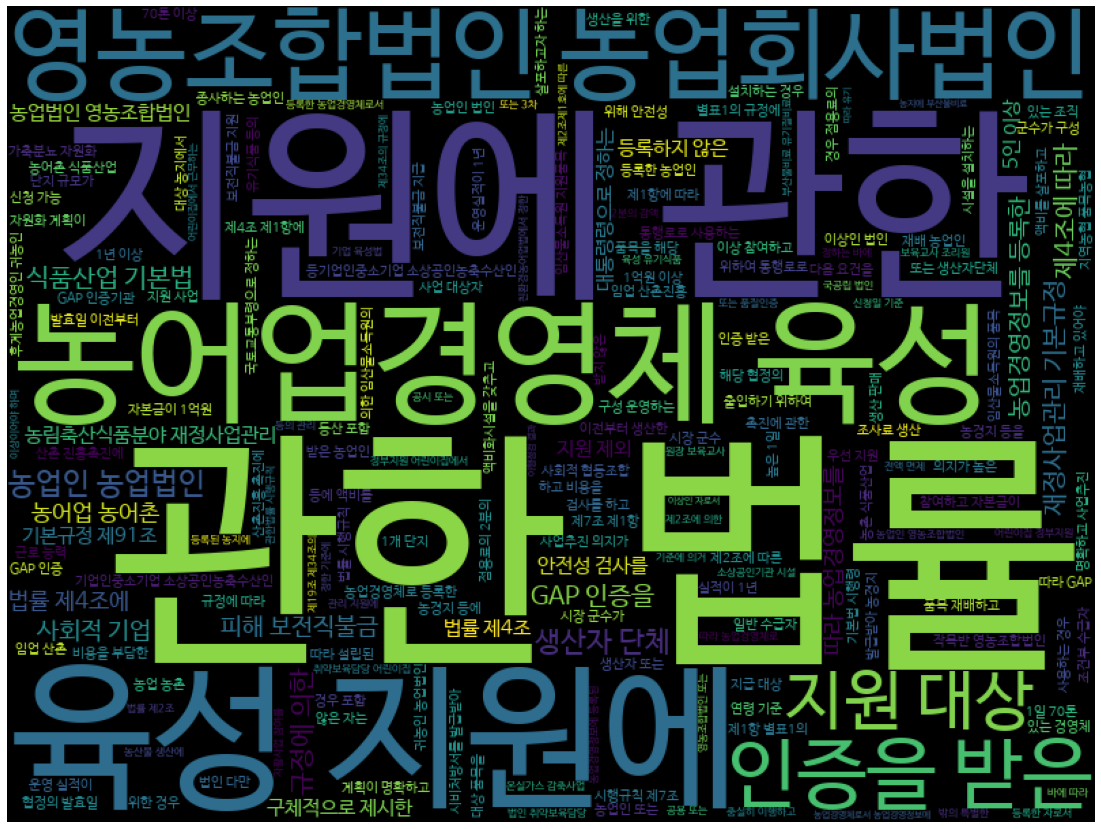

In [28]:
service_applicants = p_ent['지원대상']
applicants_txt = " ".join(service_applicants)
cloud = WordCloud(font_path='/content/drive/MyDrive/Wello+project_신희택,윤다솜/fonts/NanumBarunGothic.ttf', width=800, height=600).generate(applicants_txt)
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')